In [1]:
"""! @brief СКБ201 Тур ТВ Методы Программирования ЛР3"""

##
# @mainpage Лабораторная работа номер 3 по курсу "Методы Программирования"
#
# @brief СКБ201 Тур Т.В. Методы Программирования ЛР3
#
# @section intro Введение
# Лабораторная работа номер 3 по курсу "Методы программирования". Выполнена студентом Туром Тимофем Владимировичем группы СКБ201.
#
# @section description Описание
# В данной лабораторной работе тредуется реализовать 2 алгоритма хэширования для ключевого поля данных из лабораторной работы 2, построить хэш-таблицы, написать функцию поиска в ней, после чего проверить их работу и сравнить эффективность по времени с предыдущей лабораторной.
# Мой вариант - 24. Хэширование происходит по полю ФИО.
#
# @section link Ссылка на репозиторий
# Данный проект хранится в репозитории github по ссылке https://github.com/TimothyTur/MP_L3 .
# В силу явной ненужности многих данных doxygen, они будут отсутствовать там (кроме нужных, например как этот отчет).
# 
# @section hashTable Реализация хэш-таблицы
# Эта тема предшествует функицям хэширования, потому что в ней определятся основополагающие параметры.
# За размерность хэш-таблицы будет взята 2^18, что равно 262144. Этого уже достаточно для 100000 элементов, а предыдущая степень (131072) рискует иметь множество коллизий.
# Сами коллизии решены методом цепочек.
# 
# @section badHash "Простая" функция хэширования
# Простая хэш-функия реализована через полином по буквам в ключе. За коэффициент полинома взято 31, так как большие буквы будут восприниматься как малые, пробелы будут игнорироваться.
# 
# @section goodHash "Сложная" функция хэширования
# Сложная хэш-функция реализована по подобию rot13. В силу ограничения в 2^18 побитовый сдвиг будет взят на 11 и на 7.
# В теории этот алгоритм быстрее, так как не требует умножения, лишь побитовый сдвиг, также он даст меньше коллизий, так как основан на rot13, в котором в принципе число коллизий минимально.
# 
# @section diagramSearch Сравнительный график работы поиска
# Данный график демонстрирует время, затраченное на поиск элемента. Данные о поисков линейного, multimap, бинарного с сортировкой и просто бинарного взяты напрямую из предыдущей лабораторной.
# @image latex mpLab3Graph1.png "График работы поиска"
# На данном графике видно, что бинарный поиск, multimap и оба хэша складываются в одну прямую линию в нуле. Бинарному поиску в случае 100 000 элементов требуется не более 17 сравнений. multimap в случае python реализован на словарях, а они реализованы на хэш-таблицах, а значит его время должно примерно совпадать с новыми измерениями в этой лабораторной. Поиск по хэш-таблице в общем случае требует константное время. Число операций и там и там мало, но видимо достаточно минимально чтобы везде работать почти моментально. Потому имеем прямые и самый быстрый реализованный поиск.
# 
# @section diagramCollision Сравнительный график числа коллизий
# Данный график демонстрирует общее число коллизий в массивах в зависимости от числа элементов в выборке.
# @image latex mpLab3Graph2.png "График числа коллизий"
# На графике особой разницы в числе коллизий не видно. Что странно, так как алгоритмы принципиально разные, и вроде как сложный должен сработать лучше. Но разница видимо настолько никакая, что в виду допустимых погрешностей ее и не видно. Остается только предположить что требуется в разы больший объем выборки. Около миллиона, а то и целого миллиарда.
# Также велик шанс того что число коллизий обусловленно тем, что в выборке изначально есть элементы с одинаковыми ключами (что продемонстрированно в предыдущей лабораторной).
# 
# @section collision Предположение причины числа коллизий
# В попытках понять почему получается даже если близкое, но такое огромное число коллизий, я решил ввести счетчики уникальных ключей, используемых в таблице. Тогда каждая заполненная ячейка вносит в эту переменную вклад в единицу. В то же время функция подсчета коллизий вычисляет количество одинаковых элементов по ключу. На практике это удобно реализовать через возможности связного списка. Посчитав его длину и вычтя 1 получаем число совпадений данного конкретного хэша, а значит сумма по всем заполненным хэшам даст общее число коллизий. Это значит что каждая заполненная ячейка вносит в число коллизий вклад в длину этой ячейки минус 1.
# Тогда сумма уникальных и сумма коллизий должна совпасть с длинной выборки, так как будем иметь сумму 1 за каждую зуполненную ячейку плюс длина ячейки минус 1. Единицы сокращаются, остается длина ячейки. Сумма длинн по всем ячейкам даст число в принципе распределенных по таблице ячеек, что есть длина исходного распределения.
# И эта сумма показательна для состоятельной проверки работы программы, так как число уникальных элементов изменяется во время операций над таблицей, а вычисление коллизий - функция, вычисляемая в момент. Эта разница во времени и дает состоятельность, при совпадении чисел.
# Это было пояснение к тесту, который я сделал, чтобы проверить что все работает правильно. И так и оказалось. Программа работает корректно, но я не совсем понимаю почему тогда столько коллизий.
# Я перечитал свою же документацию выше, и подумал, а что если совпадение ключей имеет куда большее значение. В первой лабораторной, где генерируется моя выборка, за генератор ФИО я взял учебный список нашей группы, разбил на подэлементы, и генератору буквально сказал выбирать соответственно случайные элементы из полчившегося массива. И в этом и была проблема. В группе нас около 27, что дает 27 имен, 27 фамилий и 27 отчеств (не считая совпадений по группе). Тогда это 27*27*27=19683 различных значений. А значит и не удивительно что на выборке длины 100000 имеется целых 80000 коллизий.
# На чем, получается, можно сделать вывод, что сама выборка ключей изначально не подходит для исследования коллизий в хэштаблице, в виду очень возможных совпадений.
# 

##
# @file full_code.py
#
# @brief Основной исполняевый файл лабораторной работы
# 
# @sectioin description Описание
# Лабораторная работа в изначальном свое виде выполнялась в оболочке "jupyter notebook" в силу его удобства для таких целей. Этот файл является прямым последовательным копированием ячеек из итогового документа (также прикрепленного в github), по причине того что doxygen на файлы ".ipynb" не работает.
# 
# @section differs Функциональное отличие
# В предыдущих лабораторных работах вычисления производились над всеми выборками сразу. В этой же лабораторной хэш-таблица требует слишком много данных, потому вычисления будут происходить последовательно, совершая нужные измерения, после чего удаляя таблицу, приступая к следующей.
# Также в этой лабораторной работе требуются данные из предыдущей. Данные, используемые здесь, были напрямую скопированные из выводов, сохраненных как часть документации. Также поиск элементов будет осуществляться на первых найденных элементах из предыдущей работы, также сохраненных как часть документации.
# 
# @section results Результаты тестирования
# Cледующая секция представляет из себя набор вывода программы по тестам.
# Вывод для всех призводится по формату:
# <размер выборки> <время поиска в простой таблице> <время поиска в сложной> <ключ искомого элемента>
# <хэш найденного элемента простого алгоритма> <его сдвиг по цепочке> <найденный элемент>
# <хэш найденного элемента сложного алгоритма> <его сдвиг по цепочке> <найденный элемент>
# --------------------------------------------------
# <повтор для всех размерностей>
# 
# 100 0.0 0.0 Недомолкин Елизавета Эдикович
# 237488 0 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
# 28767 0 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
# --------------------------------------------------
# 500 0.0 0.0 Ташлыков Григорий Николаевич
# 83313 0 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
# 95710 0 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
# --------------------------------------------------
# 1000 0.0 0.0 Гришаев Андрей Сергеевич
# 74419 0 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
# 168114 0 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
# --------------------------------------------------
# 2000 0.0 0.0 Абдуллабеков Илья Николаевна
# 239180 0 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
# 233913 0 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
# --------------------------------------------------
# 5000 0.0 0.0 Самунин Тимофей Эдуардович
# 37393 0 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
# 112789 0 Самунин Тимофей Эдуардович 54 2009/04/23 2009/09/30 95564
# --------------------------------------------------
# 10000 0.0 0.0 Ташлыков Артём Эдуардович
# 66484 0 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
# 45054 0 Ташлыков Артём Эдуардович 72 2005/08/13 2010/07/07 68301
# --------------------------------------------------
# 20000 0.0 0.0 Красов Илья Александровна
# 231440 2 Красов Илья Александровна 20 2006/01/24 2014/04/03 37206
# 184951 2 Красов Илья Александровна 20 2006/01/24 2014/04/03 37206
# --------------------------------------------------
# 50000 0.0 0.0 Осипова Радомир Ашотович
# 139305 0 Осипова Радомир Ашотович 99 2007/12/03 2008/08/06 21649
# 39101 0 Осипова Радомир Ашотович 99 2007/12/03 2008/08/06 21649
# --------------------------------------------------
# 100000 0.0 0.0 Грицун Илья Сергеевич
# 154063 27 Грицун Илья Сергеевич 42 2009/06/14 2011/04/01 60423
# 247281 27 Грицун Илья Сергеевич 42 2009/06/14 2011/04/01 60423
# --------------------------------------------------
# 

'! @brief СКБ201 Тур ТВ Методы Программирования ЛР3'

In [2]:
# Imports
import random as rnd
import time
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class HashTable:
    """! Класс объектов, требуемых по заданию третьей лабораторной работы.
    
    Содержит в себе обе таблицы и весь требуемый функционал для них. В том числе и статические функции вычисления хэша.
    В таблицах во избежание коллизии сиспользуется метод цепочек. В силу реализации как таковых массивов в python, связный список будет реализован через простой лист.
    """
    def __init__(self):
        """! Конструктор хэш-таблицы по заданию лабораторной работы.
        
        Конструктор выделяет массивы для обеих хэш-таблиц.
        """
        self.bad  = [None]*(1<<18)
        self.good = [None]*(1<<18)
        self.uniBad = 0
        self.uniGood = 0
    
    @staticmethod
    def badHash(obj):
        """! Вариант простой хэш-функции.
        Реализован через полином по буквам в ключе. За коэффициент полинома взято 31.

        @param obj Объект вычисления хэша. Должен обладать строковым свойством key в русском алфавите.

        @return Вычисленный хэш.
        """
        nums = [ord(i.lower())-ord('а') if i!=' ' else None for i in obj.key]
        p = 1
        res = 0
        for i in nums:
            if i != None:
                res = (res+i*p)&0o777777 #модуль не сработает корректно
                p*=31                    #весьмеричное число => 18/3=6 семерок
        return res
    @staticmethod
    def goodHash(obj):
        """! Вариант сложной хэш-функции.
        Реализова по подобию rot13. В силу ограничения в 2^18 побитовый сдвиг будет взят на 11 и на 7.

        @param obj Объект вычисления хэша. Должен обладать строковым свойством key в русском алфавите

        @return Вычисленный хэш.
        """
        nums = [ord(i.lower())-ord('а') if i!=' ' else None for i in obj.key]
        res = 0
        for i in nums:
            if i != None:
                res = (res+i)&0o777777
                res = (((res<<7)&0o777777)|(res>>11))&0o777777
        return res    

    def addBad(self, elem):
        """! Добавление элемента в хэш-таблицу простого хэша.
        
        @param elem Элемент для добавления в таблицу
        """
        addr = HashTable.badHash(elem)
        if self.bad[addr] == None:
            self.bad[addr] = [elem]
            self.uniBad += 1
        else:
            self.bad[addr].append(elem)
    def addGood(self, elem):
        """! Добавление элемента в хэш-таблицу сложного хэша.
        
        @param elem Элемент для добавления в таблицу
        """
        addr = HashTable.goodHash(elem)
        if self.good[addr] == None:
            self.good[addr] = [elem]
            self.uniGood += 1
        else:
            self.good[addr].append(elem)

    def getBad(self, addr, step):
        """! Возвращает элемент таблицы простого хэша
        
        @param addr Хэш искомого элемента.
        @param step Сдвиг в цепи элементов
        
        @return Искомый элемент или None, если такого элемента нет
        """
        if addr>=(1<<18) or addr<0:   return None
        if self.bad[addr] == None:    return None
        if len(self.bad[addr])<=step: return None
        return self.bad[addr][step]
    def getGood(self, addr, step):
        """! Возвращает элемент таблицы сложного хэша
        
        @param addr Хэш искомого элемента.
        @param step Сдвиг в цепи элементов
        
        @return Искомый элемент или None, если такого элемента нет
        """
        if addr>=(1<<18) or addr<0:    return None
        if self.good[addr] == None:    return None
        if len(self.good[addr])<=step: return None
        if step<0:                     return None
        return self.good[addr][step]
    
    def popBad(self, addr, step):
        """! Удаляет элемент таблицы простого хэша.
        
        @param addr Хэш искомого элемента.
        @param step Сдвиг в цепи элементов.
        
        @return Возвращает удаленный элемент, None при ошибке.
        """
        if addr>=(1<<18) or addr<0:   return None
        if self.bad[addr] == None:    return None
        if len(self.bad[addr])<=step: return None
        if step<0:                    return None
        res = self.bad[addr].pop(step)
        if self.bad[addr] == []:
            self.bad[addr] = None
            self.uniBad -= 1
        return res
    def popGood(self, addr, step):
        """! Удаляет элемент таблицы сложного хэша.
        
        @param addr Хэш искомого элемента.
        @param step Сдвиг в цепи элементов.
        
        @return Возвращает удаленный элемент, None при ошибке.
        """
        if addr>=(1<<18) or addr<0:    return None
        if self.good[addr] == None:    return None
        if len(self.good[addr])<=step: return None
        if step<0:                     return None
        res = self.good[addr].pop(step)
        if self.good[addr] == []:
            self.good[addr] = None
            self.uniGood -= 1
        return res
        
    def searchBad(self, elem):
        """! Поиск элемента в таблице простого хэша.
        
        @param elem Искомый элемент.
        
        @return При успехе, возвращает пару (хэш, смещение), иначе '-1'.
        """
        addr = HashTable.badHash(elem)
        if self.bad[addr] == None:
            return -1
        for i in range(len(self.bad[addr])):
            if self.bad[addr][i].equal(elem):
                return (addr, i)
        return -1
    def searchGood(self, elem):
        """! Поиск элемента в таблице простого хэша.
        
        @param elem Искомый элемент.
        
        @return При успехе, возвращает пару (хэш, смещение), иначе '-1'.
        """
        addr = HashTable.goodHash(elem)
        if self.good[addr] == None:
            return -1
        for i in range(len(self.good[addr])):
            if self.good[addr][i].equal(elem):
                return (addr, i)
        return -1
    
    def collisionsBad(self):
        """! Функция просчитывает текущее число коллизий в таблице простого хэша.
        
        @return Число коллизий.
        """
        res = 0
        for i in self.bad:
            if i == None: continue
            res += len(i)-1
        return res
    def collisionsGood(self):
        """! Функция просчитывает текущее число коллизий в таблице сложного хэша.
        
        @return Число коллизий.
        """
        res = 0
        for i in self.good:
            if i == None: continue
            res += len(i)-1
        return res
            

In [4]:
#класс
class MyObject:
    """! Класс объектов, требуемых по заданию первой лабораторной работы.
    
    В предыдущей лабораторной был убран генератор класса как таковой, так как он полностью считывается с файла. Поэтому вводить вычисление хэша в конструктор не требуется. Однако это актуально для задачи чтения.
    """
    def __init__(self):
        """! Конструктор класса MyObject
        Конструктор класса объявляет переменные, которые в нем есть. Не имеет параметров.
        """
        self.fio, self.num, self.din, self.dou, self.pay, \
            self.goodHash, self.badHash = \
            None, None, None, None, None, None, None
        
    #key
    @property
    def key(self):
        """! Выделенное свойство класса - ключ
        Свойство созданно выделенным, чтобы в разы упросить обращение к нему, подмену для тестов, в то же время не требуя дополнительных ресурсов.
        """
        return self.fio
    
    #==
    def __eq__(self, other):
        """! Проверка на равенство.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key==other.key
    #>=
    def __ge__(self, other):
        """! Проверка на больше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>=other.key
    #>
    def __gt__(self, other):
        """! Проверка на больше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key>other.key
    #<=
    def __le__(self, other):
        """! Проверка на меньше или равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<=other.key
    #<
    def __lt__(self, other):
        """! Проверка на меньше.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.key<other.key
    #!=
    def __ne__(self, other):
        """! Проверка на не равно.
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return not(self.__eq__(other))
    
    def __str__(self):
        """! Выводит содержимое класса в строке через пробел.
        
        @return fio, num, din, dou, pay.
        """
        return ' '.join([self.fio, str(self.num),
                         self.din, self.dou, str(self.pay)])
    
    def writeOpenedFile(self, file):
        """! Функция записи образа объекта в открытый файл.
        
        @param file открытый файл, куда будет записан образ.
        """
        file.write(str(self)+'\n')
        
    def readOpenedFile(self, file):
        """! Функция чтения образа объекта с открытого файла.
        Функция также обновляет значения хэша.
        
        @param file открытый файл, откуда будет прочтен образ.
        """
        data = file.readline()[:-1].split(' ');
        self.fio = ' '.join(data[0:3])
        self.num = int(data[3])
        self.din = data[4]
        self.dou = data[5]
        self.pay = int(data[6])
        self.badHash  = HashTable.badHash(self)
        self.goodHash = HashTable.goodHash(self)
        return self
    
    def equal(self, other):
        """! Проверка на точное равенство.
        Требуется для поиска по хэшу
        
        @param other Объект сравнения класса MyObject.
        
        @return bool.
        """
        return self.fio==other.fio and self.num==other.num and \
            self.din==other.din and self.dou==other.dou and \
            self.pay==other.pay
        
    

In [5]:
#работа с данными
#см описание файла
ns = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
#линейны, multimap, бин+сорт, бин, хэш простой, хэш сложный
t = [[0.0, 0.0010027885437011719, 0.0, 0.001001596450805664,
      0.0009975433349609375, 0.0019996166229248047, 0.004003763198852539,
      0.008996963500976562, 0.025023460388183594],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.001001596450805664, 0.003000497817993164, 0.009999752044677734,
     0.026999473571777344, 0.07000160217285156, 0.14300251007080078,
     0.45799732208251953, 1.0950562953948975],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1]]
start = -1
collisions = [[-1]*9, [-1]*9]
#здесь взяты строки нужных элементов, чтобы при переборе правильно все восстановить
myLine = [40, 93, 593, 1779, 4102, 4901, 16205, 3801, 55846]

In [12]:
for i in range(len(ns)):
    table = HashTable()
    myKey = None
    with open('mpSample'+str(ns[i])+'.txt', 'r') as file:
        for j in range(ns[i]):
            elem = MyObject().readOpenedFile(file)
            table.addBad(elem)
            table.addGood(elem)
            if j == myLine[i]: myKey = elem
        start = time.time()
        elemHashBad, elemOffsetBad = table.searchBad(myKey)
        t[4][i] = time.time()-start
        start = time.time()
        elemHashGood, elemOffsetGood = table.searchGood(myKey)
        t[5][i] = time.time()-start
        collisions[0][i] = table.collisionsBad()
        collisions[1][i] = table.collisionsGood()
        print(ns[i], t[4][i], t[5][i], myKey.key)
        print(elemHashBad, elemOffsetBad, \
              table.getBad(elemHashBad, elemOffsetBad))
        print(elemHashGood, elemOffsetGood, \
              table.getGood(elemHashGood, elemOffsetGood))
        print(table.uniBad, table.uniGood)
        print('-'*50)
        

100 0.0 0.0 Недомолкин Елизавета Эдикович
237488 0 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
28767 0 Недомолкин Елизавета Эдикович 92 2011/04/06 2012/02/27 91881
100 100
--------------------------------------------------
500 0.0 0.0 Ташлыков Григорий Николаевич
83313 0 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
95710 0 Ташлыков Григорий Николаевич 92 2004/05/30 2013/03/23 32489
492 491
--------------------------------------------------
1000 0.0 0.0 Гришаев Андрей Сергеевич
74419 0 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
168114 0 Гришаев Андрей Сергеевич 78 2004/03/07 2008/10/15 95617
960 961
--------------------------------------------------
2000 0.0 0.0 Абдуллабеков Илья Николаевна
239180 0 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
233913 0 Абдуллабеков Илья Николаевна 96 2004/05/12 2013/11/10 71681
1831 1834
--------------------------------------------------
5000 0.0 0.0 Самунин Тимофей Эдуардович
37393 0 Самунин Т

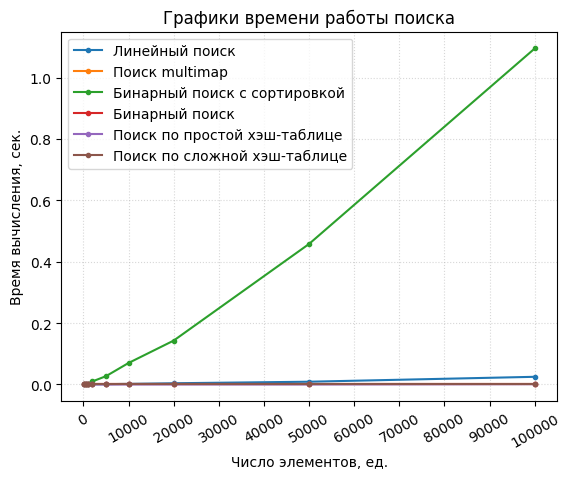

In [7]:
#графики времени
plt.plot(ns, t[0], marker='.')
plt.plot(ns, t[1], marker='.')
plt.plot(ns, t[2], marker='.')
plt.plot(ns, t[3], marker='.')
plt.plot(ns, t[4], marker='.')
plt.plot(ns, t[5], marker='.')
plt.xticks(np.arange(0, 100001, 10000), rotation=30)
#plt.yticks(rotation=70)
plt.xlabel("Число элементов, ед.")
plt.ylabel("Время вычисления, сек.")
plt.title("Графики времени работы поиска")
plt.legend(["Линейный поиск",
            "Поиск multimap",
            "Бинарный поиск с сортировкой",
            "Бинарный поиск",
            "Поиск по простой хэш-таблице",
            "Поиск по сложной хэш-таблице"],
           loc = "upper left")
plt.grid(True, alpha = 0.5, ls = "dotted")

plt.savefig('mpLab3Graph1.png', bbox_inches='tight')

In [8]:
t

[[0.0,
  0.0010027885437011719,
  0.0,
  0.001001596450805664,
  0.0009975433349609375,
  0.0019996166229248047,
  0.004003763198852539,
  0.008996963500976562,
  0.025023460388183594],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0,
  0.001001596450805664,
  0.003000497817993164,
  0.009999752044677734,
  0.026999473571777344,
  0.07000160217285156,
  0.14300251007080078,
  0.45799732208251953,
  1.0950562953948975],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009999275207519531],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

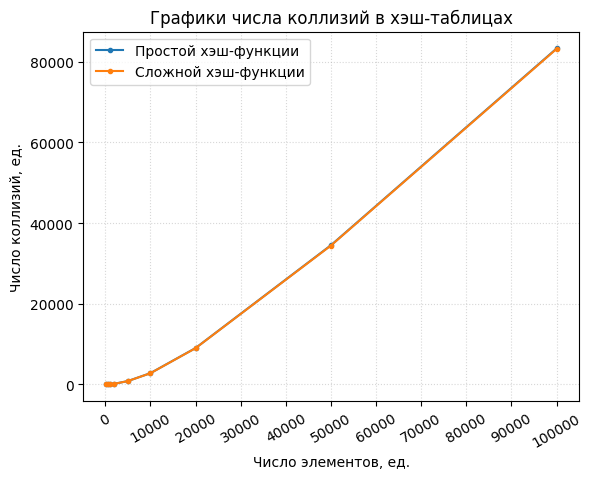

In [9]:
#графики коллизий
plt.plot(ns, collisions[0], marker='.')
plt.plot(ns, collisions[1], marker='.')
plt.xticks(np.arange(0, 100001, 10000), rotation=30)
#plt.yticks(rotation=70)
plt.xlabel("Число элементов, ед.")
plt.ylabel("Число коллизий, ед.")
plt.title("Графики числа коллизий в хэш-таблицах")
plt.legend(["Простой хэш-функции",
            "Сложной хэш-функции"],
           loc = "upper left")
plt.grid(True, alpha = 0.5, ls = "dotted")

plt.savefig('mpLab3Graph2.png', bbox_inches='tight')

In [10]:
collisions

[[0, 8, 40, 169, 845, 2807, 9026, 34522, 83303],
 [0, 9, 39, 166, 843, 2782, 8994, 34446, 83208]]